## Dataset
[Kaggle](https://www.kaggle.com/competitions/nlp-getting-started/overview)

## Project summary
An attempt ot classify Twitter disaster tweets 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.iloc[1000].target

0

In [7]:
df['lenght'] = df.text.apply(len)

In [8]:
import seaborn as sns

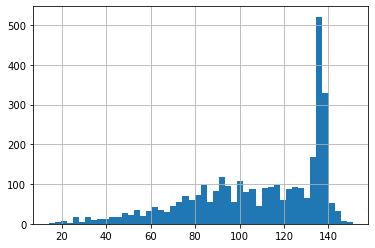

In [9]:
df[df.target==1].lenght.hist(bins=50)


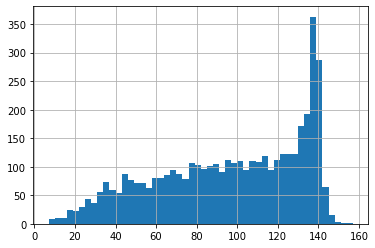

In [10]:
df[df.target==0].lenght.hist(bins=50)

In [11]:
df[df.target==0].lenght.sum()

415559

In [12]:
df[df.target==1].lenght.sum()

353639

In [13]:
df.head()

,id,keyword,location,text,target,lenght
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import  MultinomialNB

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.text
y=df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [20]:
#training data
data = pd.read_csv('test.csv')
data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
import numpy as np
from sklearn import model_selection 

In [28]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
pipe3 = Pipeline([ ('bag',CountVectorizer()), 
                  ('tfidf',TfidfTransformer()), 
                  ('model',SVC())
])

In [32]:
scores = model_selection.cross_val_score(pipe3, X, df["target"], cv=3, scoring="f1")
np.mean(scores)

0.6587967434122033

In [67]:
scores

array([0.57770075, 0.5123789 , 0.58168184])

In [70]:
pipe3.fit(X_train,y_train)
pre = pipe3.predict(X_test)
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1293
           1       0.83      0.68      0.75       991

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [72]:

## results 

results = pipe.predict(data.text)

In [89]:
data['target'] = results

In [90]:
data.head()

,id,keyword,location,text,result,target
0,0,NaN,NaN,Just happened a terrible car crash,1,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1,1


In [91]:
data[['id','target']].head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [92]:
data[['id','target']].to_csv('Submission.csv',index=False)

3263